### Problem Statement:
 ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

In [3]:
# Importing necessary libraries:

import numpy as np
import pandas as pd
from collections import Counter
from collections import OrderedDict

### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

### Data Preprocessing

import statsmodels.api as sm
from scipy import stats

### Modelling 

from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xg


### Remove unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Read the data
df = pd.read_csv('insurance (3).csv')

In [7]:
# Check data head
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [88]:
# Check data tail
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [8]:
# Check the shape of the data
df.shape

(1338, 7)

It contains total no. of 1337 records in the dataset.

### EDA

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Here, we will perform EDA on the categorical columns of the dataset - Sex, Smoker, Region and the numerical columns of the dataset - Age, BMI, Children, Charges.

In [9]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The columns - Sex, Smoker, and Region are categorical in nature so we'll modify the datatypes of these column to category.

In [11]:
# Modifying the datatypes of the columns to categorical datatype

df.sex = df.sex.astype('category')
df.smoker = df.smoker.astype('category')
df.region = df.region.astype('category')

Now, looking below the changed datatypes:-

In [12]:
# Checking data info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


Successfullly changed the data types into categorical from object.

In [13]:
# Check missing values
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [14]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Hence, there are no missing values in the dataset.

In [17]:
# Check data summary
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Feature Analysis:

In [19]:
# Categorical variable - Sex
# Value counts of the column - Sex

sex_count = df['sex'].value_counts(dropna = False)
sex_count

male      676
female    662
Name: sex, dtype: int64

There are total no. of males are 676 and total no. of females are 662.

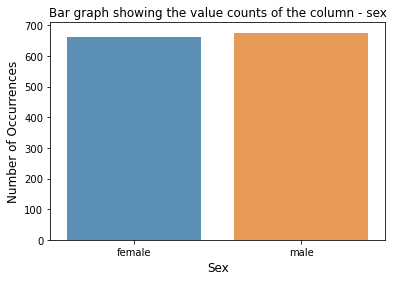

In [21]:
# Bar visualization of the column - Sex

sns.barplot(sex_count.index, sex_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - sex')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Sex', fontsize = 12)
plt.show()

From the above visualizations we can see that there are almost equal records of both males and females.

In [22]:
# Avg price for each 'gender' or 'sex'

mean_price_sex = df[['sex', 'charges']].groupby('sex', as_index = False).mean()
mean_price_sex

,sex,charges
0,female,12569.578844
1,male,13956.751178


In [24]:
# Mean/Avg charges for the column 'Smoker'

mean_price_smoker = df[['smoker','charges']].groupby('smoker', as_index = False).mean()
mean_price_smoker

,smoker,charges
0,no,8434.268298
1,yes,32050.231832


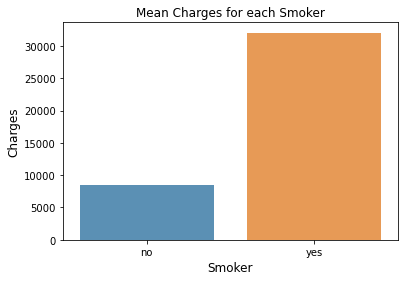

In [25]:
# Mean/Avg charges for each 'sex' or gender.

sns.barplot(mean_price_smoker['smoker'],mean_price_smoker['charges'], alpha = 0.8)
plt.title('Mean Charges for each Smoker')
plt.ylabel('Charges', fontsize = 12)
plt.xlabel('Smoker', fontsize = 12)
plt.show()

From the above graph, we can see that the mean charges are higher for an individual who smokes than their non-smoking counterparts.

This could also be the reason why men pay higher charges than female. This statement can only become true if most of the smokers are male.

Text(0.5, 1.0, 'Mean Charges by Sex and Smoker')

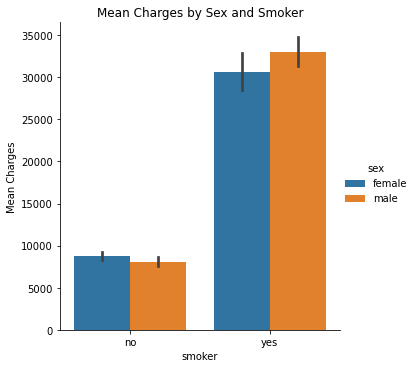

In [26]:
# Mean charges by 'Sex' and 'Smoker'

sns.factorplot(x = 'smoker', y = 'charges', hue = 'sex', data = df, kind = 'bar')
plt.ylabel('Mean Charges')
plt.title('Mean Charges by Sex and Smoker')

From the above graph, we can see that most of the people who smoke are male, hence they have high charges. Therefore, our statement is true.

In [27]:
# Value counts of the column - 'region'

region_count = df['region'].value_counts(dropna = False)
region_count

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

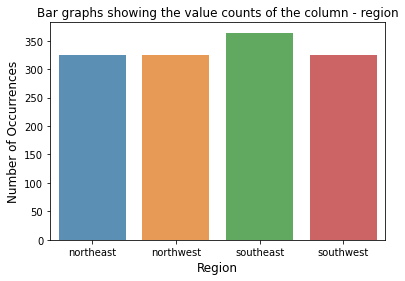

In [29]:
# Now plotting the bar graphs to highlight the no. of counts in the column 'region'

sns.barplot(region_count.index, region_count.values, alpha = 0.8)
plt.title('Bar graphs showing the value counts of the column - region')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Region', fontsize = 12)
plt.show()

As we can see from the above graph that, most of the records in the dataset belongs to the South East region.

In [30]:
# Mean price for 'region'

mean_price_region = df[['region', 'charges']].groupby('region', as_index = False).mean()
mean_price_region

,region,charges
0,northeast,13406.384516
1,northwest,12417.575374
2,southeast,14735.411438
3,southwest,12346.937377


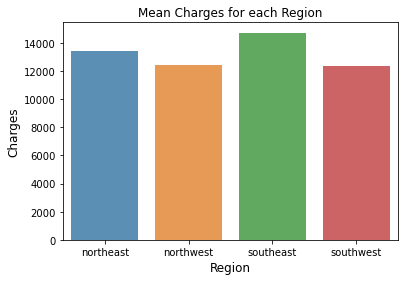

In [31]:
# Mean charges for each region

sns.barplot(mean_price_region['region'], mean_price_region['charges'], alpha = 0.8)
plt.title('Mean Charges for each Region')
plt.ylabel('Charges', fontsize = 12)
plt.xlabel('Region', fontsize = 12)
plt.show()

Now, let's look at the distribution of 'sex' and the mean \charges' for each region.

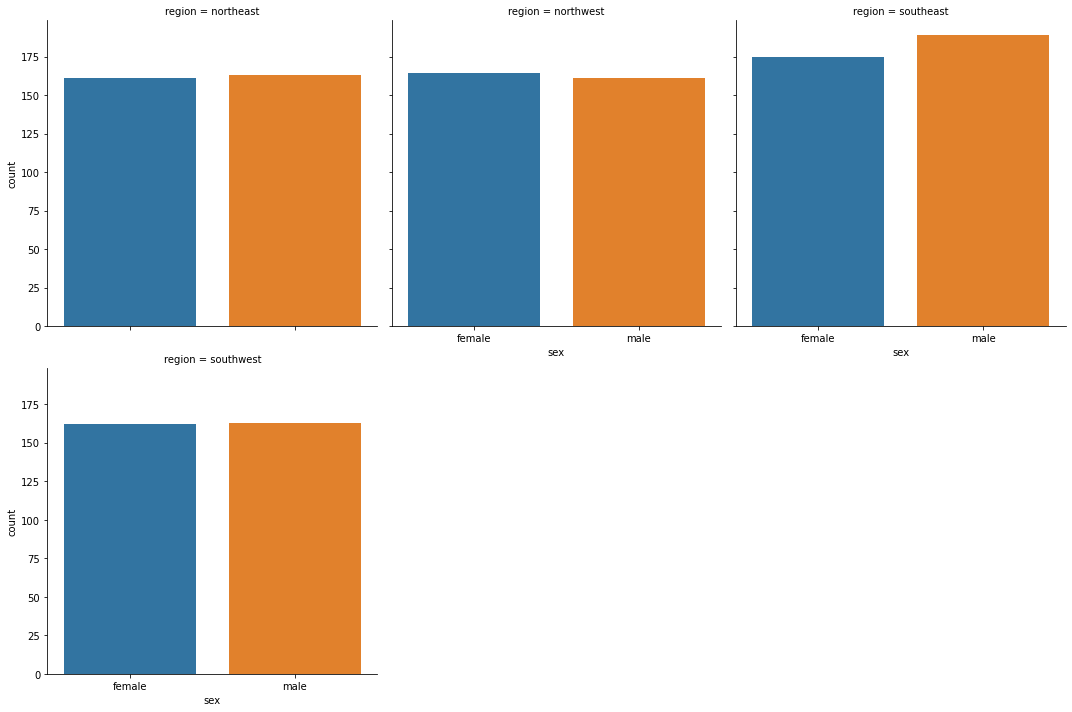

In [33]:
# Distribution of sex for each region

sns.factorplot('sex', col = 'region', data = df, kind = 'count', col_wrap = 3)

From the above graph, we can see that for every region the ratio between male and female is same except for Southeast region. Hence, the mean charge is high in the South east region than compared to other regions. We will also plot the above graph using Smoker instead of Sex.

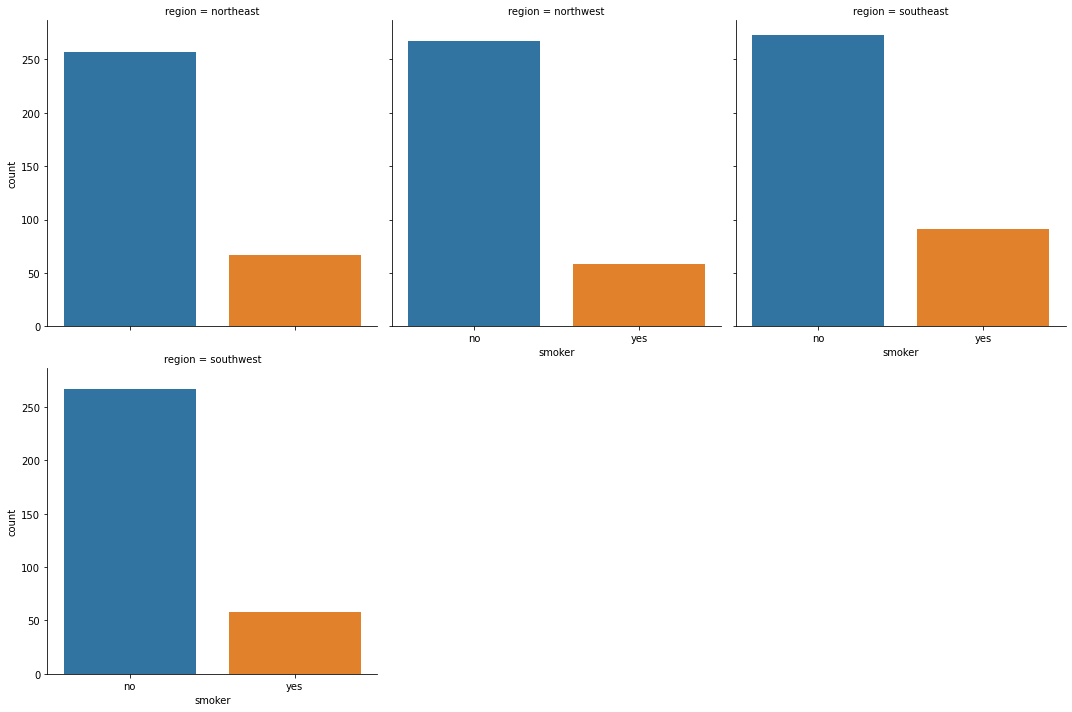

In [34]:
# Distribution of smoker for each region

sns.factorplot('smoker', col = 'region', data = df, kind = 'count', col_wrap = 3)

From the above graph, we can see that there are more people who smoke in Southeast region than compared to other regions. Hence, the higher mean charge in the Southeast region.

Text(0.5, 1.0, 'Distribution of the column - age')

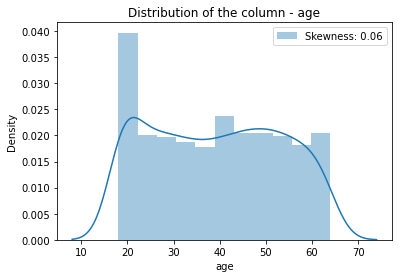

In [35]:
# Understanding the distribution of the column - 'age'

sns.distplot(df['age'], label = 'Skewness: %.2f'%(df['age'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - age')

From the above graph, we can see that the distribution has very less skewness.

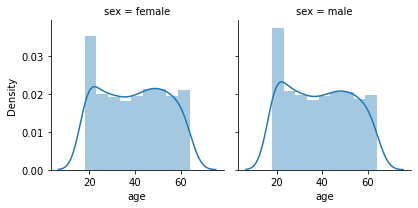

In [36]:
# Age distribution by sex

grid = sns.FacetGrid(df, col = 'sex')
grid.map(sns.distplot, 'age')

From the above graphs, we can see that the age distribution is similar in both the sex.

Text(0.5, 1.0, 'Age Distribution by Sex')

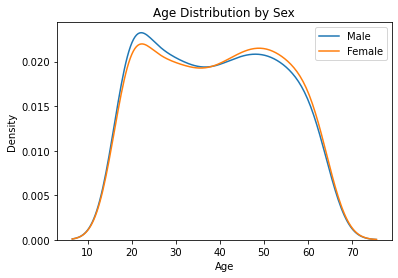

In [37]:
# Merging the above two graphs into a single graph.

sns.kdeplot(df['age'][df['sex'] == 'male'], label = 'Male')
sns.kdeplot(df['age'][df['sex'] == 'female'], label = 'Female')
plt.xlabel('Age')
plt.legend()
plt.title('Age Distribution by Sex')

From the above graph, we can see that for age close to 20 there are more male records in the dataset, whereas in case of age > 40 there are more female records.

<AxesSubplot:>

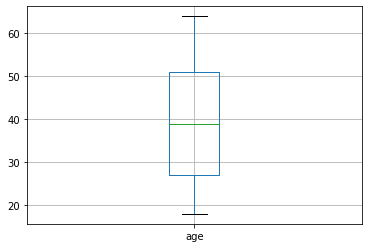

In [39]:
# Plotting a boxplot to check if the column 'age' has any outliers 

df.boxplot(column = ['age'])

We can see that there are no outliers in the column.

#### Numerical variable - BMI

Text(0.5, 1.0, 'Distribution of the column - bmi')

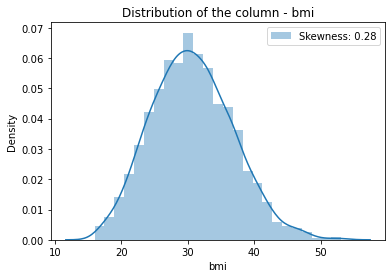

In [40]:
# Understanding the distribution of the column - 'bmi'

sns.distplot(df['bmi'], label = 'Skewness: %.2f'%(df['bmi'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - bmi')

From the above graph, we can see that the bmi column is normally distributed with a slight tail at the right

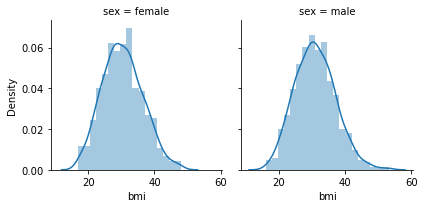

In [41]:
# BMI distribution by 'Sex'

grid = sns.FacetGrid(df, col = 'sex')
grid.map(sns.distplot, 'bmi')

From the above graph, we can see that both the graphs look similar, except in the case of male where the graph has a slight tail to the right.

Text(0.5, 1.0, 'BMI Distribution by Sex')

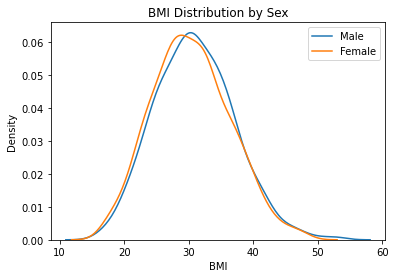

In [42]:
# Merging both the above graphs into one

sns.kdeplot(df['bmi'][df['sex'] == 'male'], label = 'Male')
sns.kdeplot(df['bmi'][df['sex'] == 'female'], label = 'Female')
plt.xlabel('BMI')
plt.legend()
plt.title('BMI Distribution by Sex')

<AxesSubplot:>

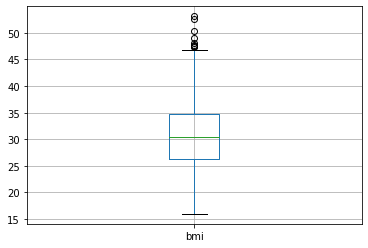

In [43]:
# Plotting a boxplot to check if the column 'bmi'has any outliers 

df.boxplot(column = ['bmi'])

We can see that there are a few outliers in the column - bmi. We will focus on removing these outliers during the Data Preprocessing phase.

#### Numerical Column - Children

Text(0.5, 1.0, 'Distribution of the column - children')

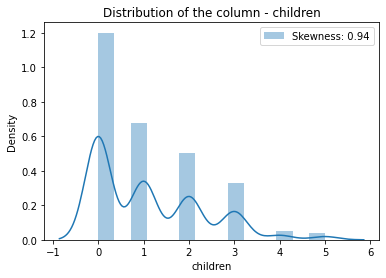

In [44]:
# Understanding the distribution of the column - children

sns.distplot(df['children'], label = 'Skewness: %.2f'%(df['children'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - children')

From the above graph, we can see that the graph is slightly skewed. Hence, we will remove this skewness during the Data Preprocessing phase.

<AxesSubplot:>

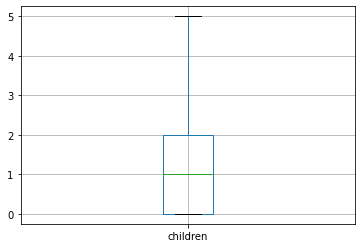

In [45]:
# Plotting a boxplot to check if the column 'children' has any outliers 

df.boxplot(column = ['children'])

We can see that there are no outliers in the column.

#### Numerical variable - Charges

Text(0.5, 1.0, 'Distribution of the column - charges')

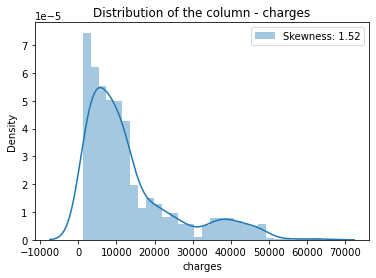

In [46]:
# Understanding the distribution of the column - 'charges'

sns.distplot(df['charges'], label = 'Skewness: %.2f'%(df['charges'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - charges')

<AxesSubplot:>

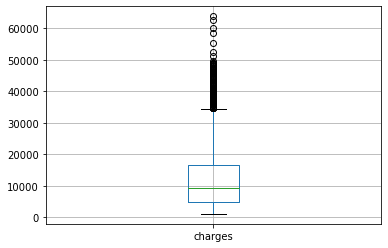

In [47]:
# Plotting a boxplot to check if the column 'Charges' has any outliers 

df.boxplot(column = ['charges'])

we can see that there are a few outliers in the column - charges. We will focus on removing these outliers during the Data Preprocessing phase.

### Data Preprocessing

Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

- Drop unnecessary columns
- Data Trasformation
- Feature Encoding
- Feature Selection

#### Drop unnecessary columns:

From the dataset, we can see that the column region is redundant, as we can see that it is completely dependent on the columns sex and smoker.

In [48]:
# Dropping the column - 'region'

modified_df = df.copy()
modified_df.drop(['region'], axis = 1, inplace = True)

In [49]:
# Checking the modified dataset

modified_df

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


#### Data Transformation

Here, we will focus on transforming the column - children using Box Cox transformation. After that we will scale all the columns using Min Max normalization.

**Box Cox transforming the column - children**

Text(0.5, 1.0, 'Distribution of the column - children')

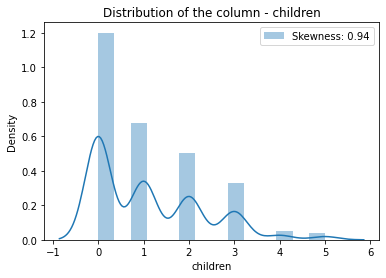

In [50]:
# Understanding the distribution of the column - 'children'

sns.distplot(modified_df['children'], label = 'Skewness: %.2f'%(modified_df['children'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - children')

Text(0.5, 1.0, 'Distribution of the column - children')

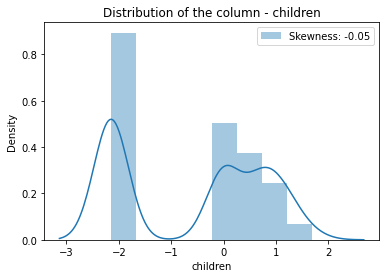

In [51]:
# Understanding the distribution of the data Box_Cox(children)

children_data = [0.1 if value == 0 else value for value in modified_df['children']]

modified_children, _ = stats.boxcox(children_data)
modified_df['children'] = modified_children

sns.distplot(modified_df['children'], label = 'Skewness: %.2f'%(modified_df['children'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - children')

From the above graph, we can see that most of the skewness is removed in the column.

In [52]:
# A function to normalize numerical columns

def normalize_columns(dataframe, column):
    data = dataframe[column]
    mini = min(data)
    maxi = max(data)
    
    new_data = []
    for value in data:
        new_data.append((value - mini)/(maxi - mini))
    
    dataframe[column] = new_data

numerical_columns = ['age', 'bmi', 'children']

for each_column in numerical_columns:
    normalize_columns(modified_df, each_column)

In [53]:
# Looking again at the sample records of the dataset

modified_df

,age,sex,bmi,children,smoker,charges
0,0.021739,female,0.321227,0.000000,yes,16884.92400
1,0.000000,male,0.479150,0.559508,no,1725.55230
2,0.217391,male,0.458434,0.855475,no,4449.46200
3,0.326087,male,0.181464,0.000000,no,21984.47061
4,0.304348,male,0.347592,0.000000,no,3866.85520
...,...,...,...,...,...,...
1333,0.695652,male,0.403820,0.855475,no,10600.54830
1334,0.000000,female,0.429379,0.000000,no,2205.98080
1335,0.000000,female,0.562012,0.000000,no,1629.83350
1336,0.065217,female,0.264730,0.000000,no,2007.94500


#### Feature Encoding:

Feature encoding is the process of turning categorical data in a dataset into numerical data. It is essential that we perform feature encoding because most machine learning models can only interpret numerical data and not data in text form.

Here, we will use **One Hot Encoding** for the columns - sex, smoker

In [54]:
# One Hot Encoding the columns - sex, smoker of the dataset

encoded_df = pd.get_dummies(data = modified_df, columns = ['sex', 'smoker'])
encoded_df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
0,0.021739,0.321227,0.000000,16884.92400,1,0,0,1
1,0.000000,0.479150,0.559508,1725.55230,0,1,1,0
2,0.217391,0.458434,0.855475,4449.46200,0,1,1,0
3,0.326087,0.181464,0.000000,21984.47061,0,1,1,0
4,0.304348,0.347592,0.000000,3866.85520,0,1,1,0
...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.855475,10600.54830,0,1,1,0
1334,0.000000,0.429379,0.000000,2205.98080,1,0,1,0
1335,0.000000,0.562012,0.000000,1629.83350,1,0,1,0
1336,0.065217,0.264730,0.000000,2007.94500,1,0,1,0


In [55]:
# Create the column - Target using charges

target_data = encoded_df['charges']
encoded_df['Target'] = target_data

### Dropping the column - charges

encoded_df.drop(['charges'], axis = 1, inplace = True)
encoded_df

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,Target
0,0.021739,0.321227,0.000000,1,0,0,1,16884.92400
1,0.000000,0.479150,0.559508,0,1,1,0,1725.55230
2,0.217391,0.458434,0.855475,0,1,1,0,4449.46200
3,0.326087,0.181464,0.000000,0,1,1,0,21984.47061
4,0.304348,0.347592,0.000000,0,1,1,0,3866.85520
...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.855475,0,1,1,0,10600.54830
1334,0.000000,0.429379,0.000000,1,0,1,0,2205.98080
1335,0.000000,0.562012,0.000000,1,0,1,0,1629.83350
1336,0.065217,0.264730,0.000000,1,0,1,0,2007.94500


#### Feature Selection:
Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

Plotting the correlation matrix for the numerical columns

In [56]:
# Creating a filter_dataframe

filter_df = encoded_df[['age', 'bmi', 'children']]
filter_df

,age,bmi,children
0,0.021739,0.321227,0.000000
1,0.000000,0.479150,0.559508
2,0.217391,0.458434,0.855475
3,0.326087,0.181464,0.000000
4,0.304348,0.347592,0.000000
...,...,...,...
1333,0.695652,0.403820,0.855475
1334,0.000000,0.429379,0.000000
1335,0.000000,0.562012,0.000000
1336,0.065217,0.264730,0.000000


Text(0.5, 1.0, 'Correlation Heatmap')

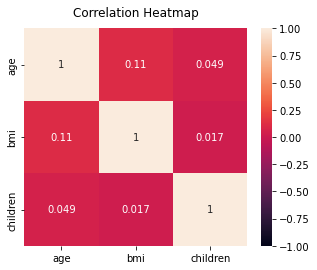

In [57]:
# Plotting the correlation between various columns of the filter_dataframe

plt.figure(figsize = (5,4))
heatmap = sns.heatmap(filter_df.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize' : 12}, pad = 12)

From the above correlation matrix, we can see that there are a no strong correlations between the data. We will use VIF to check for multi collinearity

####  Removing the columns that cause multicollinearity using VIF

In [58]:
# Detecting the columns that cause multicollinearity using VIF

column_names = list(filter_df.columns)

for name in column_names:
    if len(column_names) >= 2:
        Y = filter_df.loc[:, filter_df.columns == name]
        X = filter_df.loc[:, filter_df.columns != name]
        X = sm.add_constant(X)
        linear_model = sm.OLS(Y, X)
        results = linear_model.fit()
        r_squared = results.rsquared
        vif_value = round(1/(1 - r_squared), 2)
        print("Column: {} and VIF: {}".format(name, vif_value))
        
        if vif_value > 10:
            filter_df = filter_df.drop([name], axis = 1)
            column_names.remove(name)

Column: age and VIF: 1.01
Column: bmi and VIF: 1.01
Column: children and VIF: 1.0


From the above data, we can see that there are no columns that cause multicollinearity.



### Modelling

Scikit-learn is one of the most popular libraries for machine learning in Python and that is what we will use in the modelling part of this project.

Since Health Insurance Price Prediction is a regression problem, we will need to use regression models, also known as regressors, to train on our model to make predictions. I highly recommend checking out the scikit-learn documentation for more information on the different machine learning models available in their library. I have chosen the following regression models for the job:

- Multi Linear Regression
- Lasso Regression
- Ridge Regression
- Support Vector Regression
- Decision Tree regression
- Random Forest Regression
- Stacking Regression
- XGBoost Regression

In this section of the notebook, I will fit the models to the training set as outlined above and evaluate their Root Mean Squared Error (RMSE), R-squared at making predictions. Then, we will select the best model based on those values.

**Splitting the dataset into Training and Test sets:**

Here, we will split the training data into X_train, X_test, Y_train, and Y_test so that they can be fed to the machine learning models that are used in the next section. Then the model with the best performance will be used to predict the result on the given test dataset.

In [59]:
# Splitting the dataset to the matrices X and Y

X = encoded_df.iloc[:, : -1].values
Y = encoded_df.iloc[:, -1].values

In [60]:
# Looking at the new training data - X

X

array([[0.02173913, 0.3212268 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.47914985, 0.55950799, ..., 1.        , 1.        ,
        0.        ],
       [0.2173913 , 0.45843422, 0.85547528, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.56201238, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.06521739, 0.26472962, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.93478261, 0.35270379, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [61]:
# Looking at the new test data - Y

Y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [62]:
# Separating the dataset into train and test in the ratio of 80 : 20

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 27, shuffle = True)

Now, we apply regressors using the above data.

In [63]:
# Dictionary to store model and its RMSE

model_rmse = OrderedDict()

In [64]:
# Dictionary to store model and its R-squared

model_r2 = OrderedDict()

**Applying Multi Linear Regression**

In [66]:
# Training the Multi Linear Regression model on the Training set

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

LinearRegression()

In [67]:
# Predicting the Test set results

Y_pred = linear_regressor.predict(X_test)

In [68]:
# Calculating RMSE and R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Multi Linear Regression'] = rmse
model_r2['Multi Linear Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 6310.64
R-squared value of the model is : 0.729


#### Applying Decision Tree Regression

In [70]:
# Training the Decision Tree Regression model on the Training set

decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [71]:
# Predicting the Test set results

Y_pred = decision_tree_regressor.predict(X_test)

In [72]:
# Calculating RMSE and R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Decision Tree Regression'] = rmse
model_r2['Decision Tree Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 7484.231
R-squared value of the model is : 0.619


#### Applying Random Forest Regression (10 trees)

In [73]:
# Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 10, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=27)

In [74]:
# Predicting the Test set results

Y_pred = random_forest_regressor.predict(X_test)

In [75]:
## Calculating RMSE and R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (10 trees)'] = rmse
model_r2['Random Forest Regression (10 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 5674.102
R-squared value of the model is : 0.781


In [76]:
# Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 25, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=25, random_state=27)

In [77]:
# Predicting the Test set results

Y_pred = random_forest_regressor.predict(X_test)

In [78]:
# Calculating RMSE and R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (25 trees)'] = rmse
model_r2['Random Forest Regression (25 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 5720.118
R-squared value of the model is : 0.778


#### Applying Random Forest Regression (50 trees)

In [79]:
# Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 50, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=50, random_state=27)

In [80]:
# Predicting the Test set results

Y_pred = random_forest_regressor.predict(X_test)

In [81]:
# Calculating RMSE and R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (50 trees)'] = rmse
model_r2['Random Forest Regression (50 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 5627.492
R-squared value of the model is : 0.785


In [82]:
# Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 100, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=27)

In [83]:
# Predicting the Test set results

Y_pred = random_forest_regressor.predict(X_test)

In [84]:
# Calculating RMSE and R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (100 trees)'] = rmse
model_r2['Random Forest Regression (100 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 5568.514
R-squared value of the model is : 0.789


#### Model evaluation
Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses.

#### RMSE, R-squared of the models
Now we will tabulate all the models along with their RMSE, R-Squared. This data is stored in the model_rmse, model_r2 dictionary. We will use the tabulate package for tabulating the results.

In [86]:
# Looking at the model rmse dictionary

model_rmse

OrderedDict([('Multi Linear Regression', 6310.64),
             ('Decision Tree Regression', 7484.231),
             ('Random Forest Regression (10 trees)', 5674.102),
             ('Random Forest Regression (25 trees)', 5720.118),
             ('Random Forest Regression (50 trees)', 5627.492),
             ('Random Forest Regression (100 trees)', 5568.514)])

In [87]:
# Looking at the model r-squared dictionary

model_r2

OrderedDict([('Multi Linear Regression', 0.729),
             ('Decision Tree Regression', 0.619),
             ('Random Forest Regression (10 trees)', 0.781),
             ('Random Forest Regression (25 trees)', 0.778),
             ('Random Forest Regression (50 trees)', 0.785),
             ('Random Forest Regression (100 trees)', 0.789)])

From the above table, we can see that the model **Random Forest Regression (100 trees)** has the least Root Mean Squared Error of 5568.514 and the **highest R-squared** value of 0.789.